###  Problem Definition
A company wants to analyze user behavior to:
- Identify the most active users
- Detect which pages users exit from
- Provide actionable recommendations to improve user experience


In [15]:
import pandas as pd

# Load user-related data from CSV file
users = pd.read_csv("E:/Study/Data Science/projects/مشروع تحليلي كامل لتطبيق موبايل (Mobile App Analytics)/users_full.csv")

# Load session-related data from CSV file
sessions = pd.read_csv("E:/Study/Data Science/projects/مشروع تحليلي كامل لتطبيق موبايل (Mobile App Analytics)/sessions_full.csv")


In [16]:
# ----------------- USERS DATA EXPLORATION -----------------

print("\n------ USERS DATA OVERVIEW ------\n")

# Display dataset shape: number of rows and columns
print(f"Rows: {users.shape[0]}, Columns: {users.shape[1]}\n")

# Preview the first 5 rows of the dataset
print(users.head(), "\n")

# Display column types, non-null counts, and memory usage
print(users.info(), "\n")

# Generate descriptive statistics for numerical columns
print(users.describe(), "\n")

# Count unique values in selected categorical columns
print("Unique Counts:\n", users[['Device', 'Source']].nunique(), "\n")

# Show all unique values in 'Device' and 'Source' columns
print("Unique values in Device:\n", users['Device'].unique(), "\n")
print("Unique values in Source:\n", users['Source'].unique(), "\n")

# Count frequency of each category in 'Device' and 'Source'
print("Device Value Counts:\n", users['Device'].value_counts(dropna=False), "\n")
print("Source Value Counts:\n", users['Source'].value_counts(dropna=False), "\n")

# Count of missing values in each column
print("Missing values (Count):\n", users.isna().sum(), "\n")

# Percentage of missing values in each column
print("Missing values (%):\n", users.isna().mean() * 100, "\n")



------ USERS DATA OVERVIEW ------

Rows: 20000, Columns: 7

   UserID  Age  Gender          Device       OS    Source  IsNewUser
0       1   56    Male  Xiaomi Note 11  Android   Organic          0
1       2   46    Male     Samsung S23  Android   Organic          1
2       3   32  Female     Samsung S21  Android   Organic          1
3       4   25    Male     Samsung S21  Android   Organic          0
4       5   38  Female     Samsung S23  Android  Paid Ads          0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserID     20000 non-null  int64 
 1   Age        20000 non-null  int64 
 2   Gender     19190 non-null  object
 3   Device     19024 non-null  object
 4   OS         19500 non-null  object
 5   Source     19057 non-null  object
 6   IsNewUser  20000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None 

       


------ OUTLIERS IN USERS DATA ------



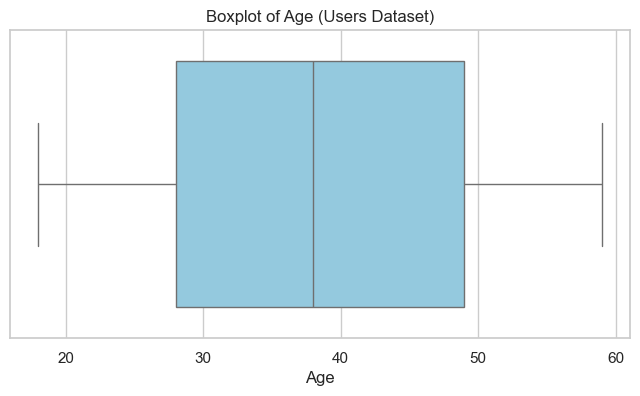

Outliers in 'Age': 0 rows
Lower bound: -3.5, Upper bound: 80.5



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns in users dataset for outlier detection
numeric_cols_users = ['Age']

print("\n------ OUTLIERS IN USERS DATA ------\n")

for col in numeric_cols_users:
    # Create a boxplot to visualize outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=users[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Users Dataset)')
    plt.xlabel(col)
    plt.show()
    
    # Detect outliers using the IQR (Interquartile Range) method
    Q1 = users[col].quantile(0.25)  # First quartile
    Q3 = users[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower = Q1 - 1.5 * IQR          # Lower bound for outliers
    upper = Q3 + 1.5 * IQR          # Upper bound for outliers
    
    # Filter out the rows considered as outliers
    outliers = users[(users[col] < lower) | (users[col] > upper)]
    
    # Print the number of detected outliers and the bounds
    print(f"Outliers in '{col}': {outliers.shape[0]} rows")
    print(f"Lower bound: {lower}, Upper bound: {upper}\n")


 Outliers Analysis – Users Data (Age)

- We performed an outlier detection on the `Age` column using the IQR (Interquartile Range) method.
- The calculated bounds were:
  - Lower Bound: -3.5
  - Upper Bound: 80.5
- Since all age values fall within this range, there are no outliers detected in the `Age` column.
- This indicates that the age distribution is clean and doesn't contain any abnormal or extreme values.


In [18]:
print("\n------ Users Data Cleaning ------\n")

# 1. Quick look at missing values before cleaning
print("Missing values before cleaning:\n", users.isna().sum(), "\n")
print("Missing values percentage:\n", users.isna().mean() * 100, "\n")

# 2. Handling missing values

# Fill missing values in 'Gender' with the most frequent value (mode)
users['Gender'].fillna(users['Gender'].mode()[0], inplace=True)

# Fill missing values in 'Device' with the most frequent value (mode)
users['Device'].fillna(users['Device'].mode()[0], inplace=True)

# Fill missing values in 'OS' with the most frequent value (mode)
users['OS'].fillna(users['OS'].mode()[0], inplace=True)

# Fill missing values in 'Source' with the most frequent value (mode)
users['Source'].fillna(users['Source'].mode()[0], inplace=True)

# 3. Confirm that all missing values have been handled
print("Missing values after cleaning:\n", users.isna().sum(), "\n")

# 4. Final quick look at the cleaned data
print("Data overview after cleaning:\n")
print(users.head())
print(users.info())



------ Users Data Cleaning ------

Missing values before cleaning:
 UserID         0
Age            0
Gender       810
Device       976
OS           500
Source       943
IsNewUser      0
dtype: int64 

Missing values percentage:
 UserID       0.000
Age          0.000
Gender       4.050
Device       4.880
OS           2.500
Source       4.715
IsNewUser    0.000
dtype: float64 

Missing values after cleaning:
 UserID       0
Age          0
Gender       0
Device       0
OS           0
Source       0
IsNewUser    0
dtype: int64 

Data overview after cleaning:

   UserID  Age  Gender          Device       OS    Source  IsNewUser
0       1   56    Male  Xiaomi Note 11  Android   Organic          0
1       2   46    Male     Samsung S23  Android   Organic          1
2       3   32  Female     Samsung S21  Android   Organic          1
3       4   25    Male     Samsung S21  Android   Organic          0
4       5   38  Female     Samsung S23  Android  Paid Ads          0
<class 'pandas.core.fr

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\2896804773.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Gender'].fillna(users['Gender'].mode()[0], inplace=True)
C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\2896804773.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

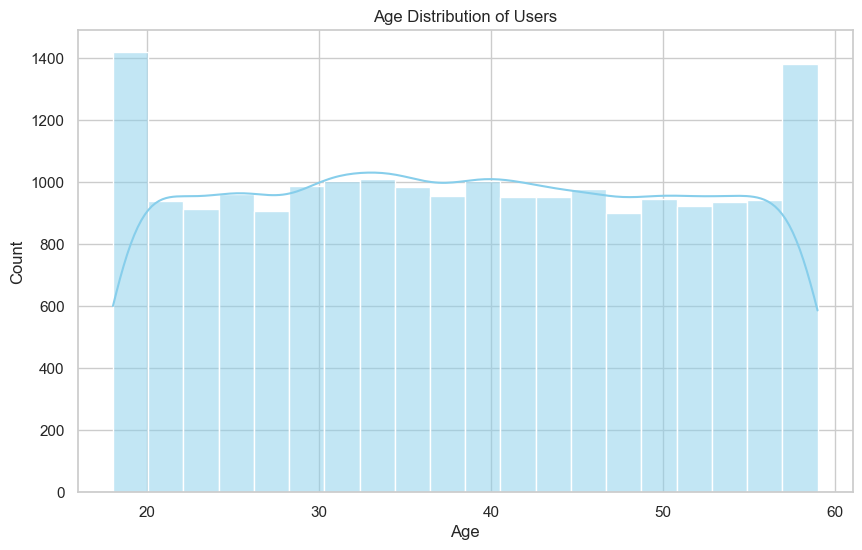

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\543842429.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=users, palette='pastel')


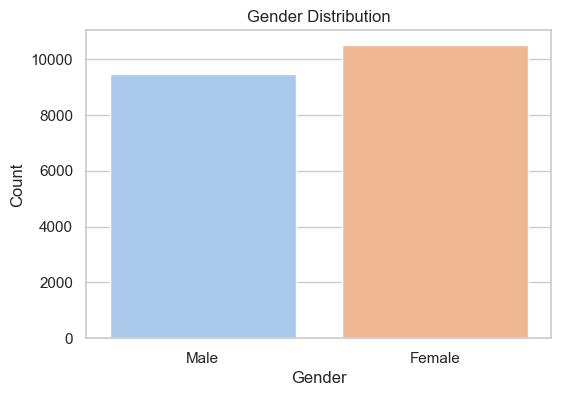

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\543842429.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Device', data=users, order=users['Device'].value_counts().index, palette='viridis')


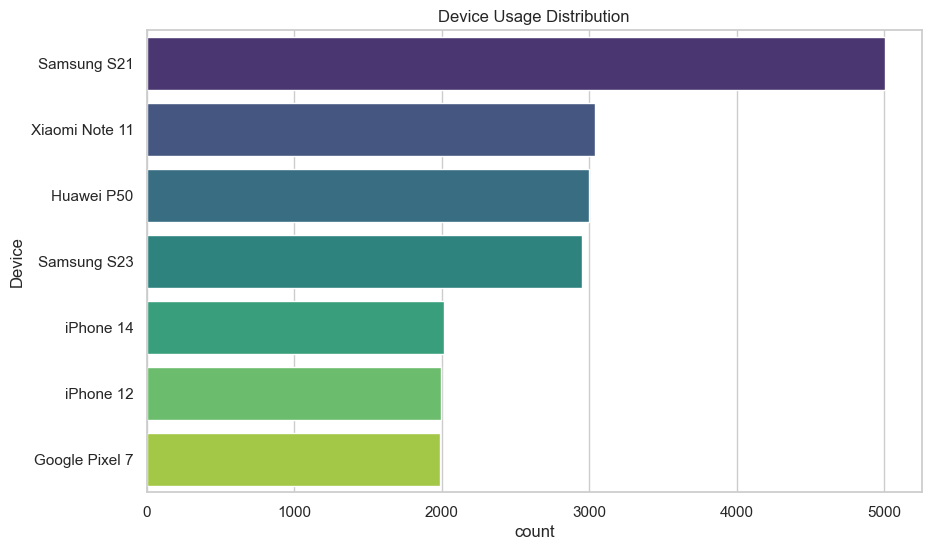

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\543842429.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OS', data=users, palette='Set2')


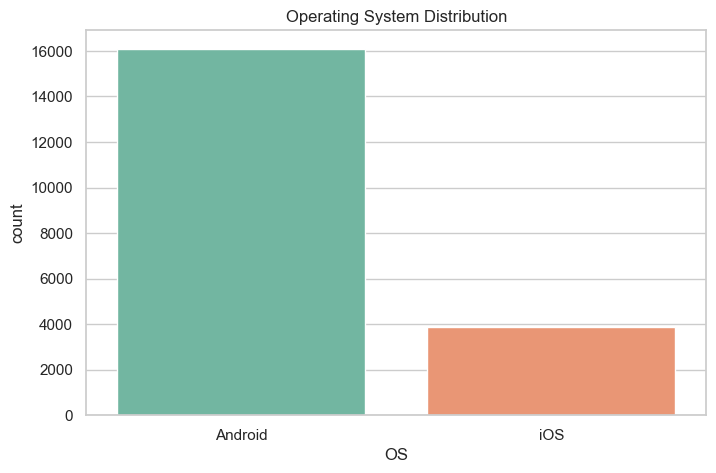

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\543842429.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Source', data=users, palette='muted')


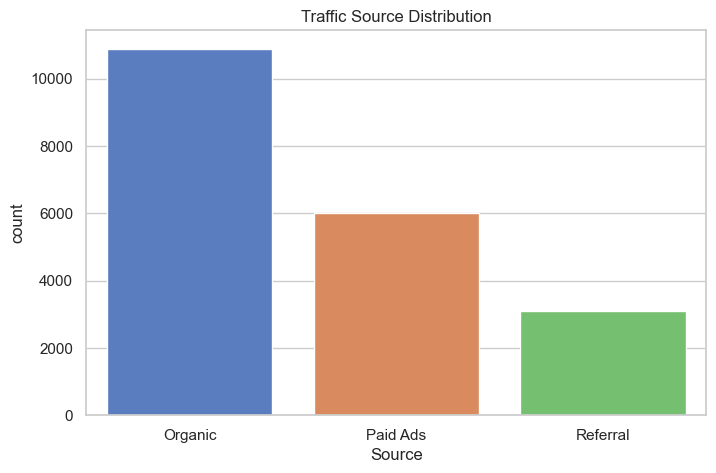

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\543842429.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsNewUser', data=users, palette='coolwarm')


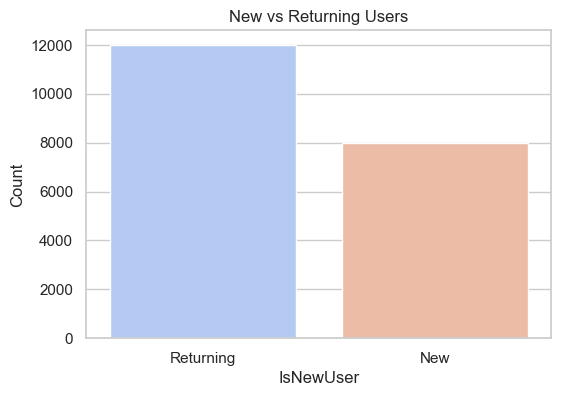

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean and modern plot style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# -------------------------------
# 1. Age Distribution
# -------------------------------
# Plot histogram and KDE for user ages
plt.figure(figsize=(10,6))
sns.histplot(users['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 2. Gender Distribution
# -------------------------------
# Show distribution of gender in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=users, palette='pastel')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 3. Device Usage Distribution
# -------------------------------
# Show which device types are most used by users
plt.figure(figsize=(10,6))
sns.countplot(y='Device', data=users, order=users['Device'].value_counts().index, palette='viridis')
plt.title('Device Usage Distribution')
plt.show()

# -------------------------------
# 4. Operating System Distribution
# -------------------------------
# Display distribution of operating systems used by users
plt.figure(figsize=(8,5))
sns.countplot(x='OS', data=users, palette='Set2')
plt.title('Operating System Distribution')
plt.show()

# -------------------------------
# 5. Traffic Source Distribution
# -------------------------------
# Show which traffic sources are bringing users to the app
plt.figure(figsize=(8,5))
sns.countplot(x='Source', data=users, palette='muted')
plt.title('Traffic Source Distribution')
plt.show()

# -------------------------------
# 6. New vs Returning Users
# -------------------------------
# Visualize count of new vs returning users
plt.figure(figsize=(6,4))
sns.countplot(x='IsNewUser', data=users, palette='coolwarm')
plt.title('New vs Returning Users')
plt.xticks([0,1], ['Returning', 'New'])  # Replace 0 and 1 with readable labels
plt.ylabel('Count')
plt.show()


## Users Data - Key Observations

### Age Distribution
- Most users are between 20 and 60 years old.
- There are noticeable peaks at age 20 and age 60, each with around 1400 users.
- User count within the 20-60 range is generally stable, mostly between 800 to 1000 users per age.

**Conclusion:**  
The app attracts a broad age range, including young adults and older users.

---

### Gender Distribution
- Female users: just over 10,000.
- Male users: slightly over 9,000.

**Conclusion:**  
The gender distribution is fairly balanced, with a slight female majority.

---

### Device Distribution
- Most common device: Samsung S21 (~5000 users).
- Other popular devices: Xiaomi Note 11, Huawei P50, Samsung S23 (~3000 users each).
- Devices like iPhone 12, iPhone 14, Google Pixel 7 have around 2000 users each.

**Conclusion:**  
Samsung and Xiaomi devices dominate. Testing and optimization should prioritize these devices.

---

### Operating System
- Android users: around 16,000.
- iOS users: around 4,000.

**Conclusion:**  
The app is mainly used on Android devices, but iOS compatibility should still be maintained.

---

### Traffic Source
- Organic: over 10,000 users.
- Paid Ads: around 6,000 users.
- Referral: between 2,000 and 4,000 users.

**Conclusion:**  
Organic traffic is strong, but Paid Ads and Referral sources are also important.

---

### New vs Returning Users
- New users: around 8,000.
- Returning users: around 12,000.

**Conclusion:**  
Good retention rate, with returning users forming the majority.

---



In [20]:
# ----------------- SESSIONS DATA OVERVIEW -----------------

print("\n------ SESSIONS DATA OVERVIEW ------\n")

# Display shape of the sessions DataFrame
print(f"Rows: {sessions.shape[0]}, Columns: {sessions.shape[1]}\n")

# Display first 5 rows to understand structure
print(sessions.head(), "\n")

# Show general information including data types and non-null counts
print(sessions.info(), "\n")

# Summary statistics for numeric columns
print(sessions.describe(), "\n")

# Count of unique values in key categorical columns
print("Unique Counts:\n", sessions[['ExitPage', 'Conversion']].nunique(), "\n")

# Display actual unique values for ExitPage and Conversion columns
print("Unique values in ExitPage:\n", sessions['ExitPage'].unique(), "\n")
print("Unique values in Conversion:\n", sessions['Conversion'].unique(), "\n")

# Frequency distribution of ExitPage and Conversion values
print("ExitPage Value Counts:\n", sessions['ExitPage'].value_counts(dropna=False), "\n")
print("Conversion Value Counts:\n", sessions['Conversion'].value_counts(dropna=False), "\n")

# Check for missing values - count and percentage
print("Missing values (Count):\n", sessions.isna().sum(), "\n")
print("Missing values (%):\n", sessions.isna().mean() * 100, "\n")



------ SESSIONS DATA OVERVIEW ------

Rows: 80369, Columns: 9

   UserID  SessionDuration(min)  PagesVisited  Clicks  Scrolls  Likes  \
0       1              6.954267             3       9       18      0   
1       1              4.114333             4      13        4      1   
2       1              7.203689             1      15       42      0   
3       2              8.098038             5      18       30      0   
4       2              4.602450             2      18        0      0   

  ExitPage  Conversion  NetworkSpeed(Mbps)  
0     Home           0           14.228400  
1  Profile           0           25.191228  
2     Home           0           14.528883  
3   Search           0           21.410426  
4     Home           0           19.557884   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80369 entries, 0 to 80368
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID    


------ OUTLIERS IN SESSIONS DATA ------



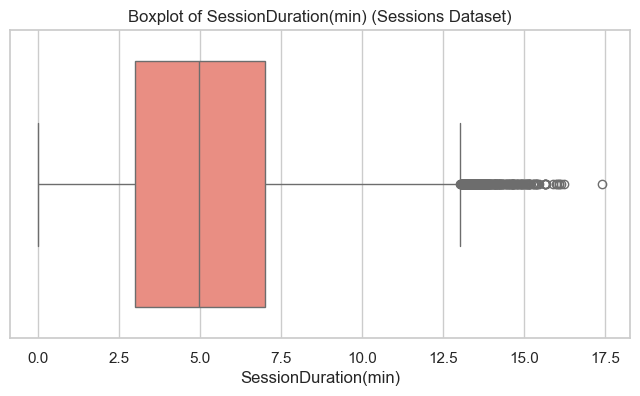

Outliers in 'SessionDuration(min)': 284 rows
Lower bound: -3.0325927530382684, Upper bound: 13.030890186634167



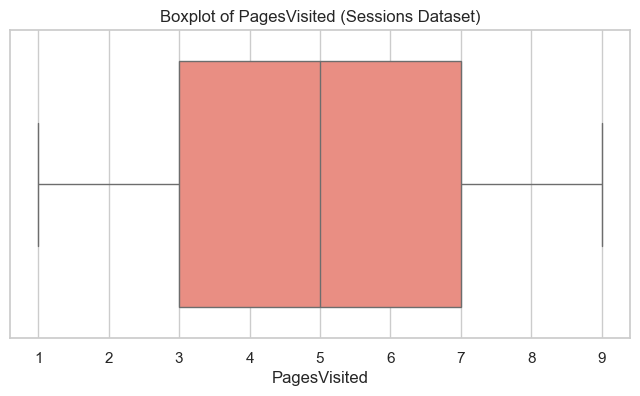

Outliers in 'PagesVisited': 0 rows
Lower bound: -3.0, Upper bound: 13.0



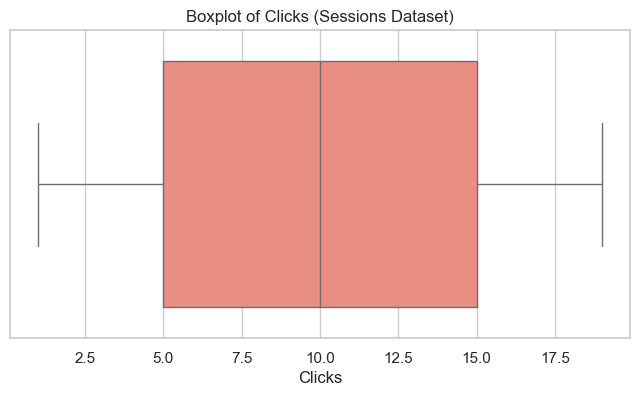

Outliers in 'Clicks': 0 rows
Lower bound: -10.0, Upper bound: 30.0



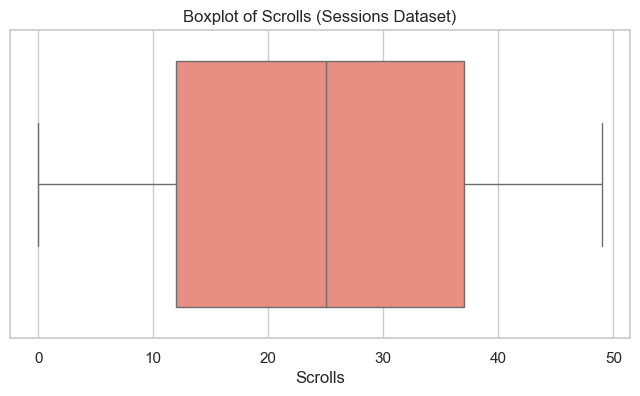

Outliers in 'Scrolls': 0 rows
Lower bound: -25.5, Upper bound: 74.5



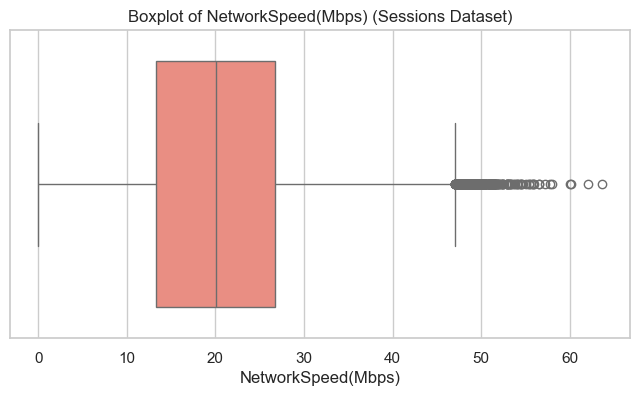

Outliers in 'NetworkSpeed(Mbps)': 289 rows
Lower bound: -6.903241832093709, Upper bound: 47.000446853563616



In [21]:
# ----------------- OUTLIER DETECTION FOR SESSIONS DATA -----------------

# Define the numeric columns to analyze for outliers
numeric_cols_sessions = ['SessionDuration(min)', 'PagesVisited', 'Clicks', 'Scrolls', 'NetworkSpeed(Mbps)']

print("\n------ OUTLIERS IN SESSIONS DATA ------\n")

# Iterate through each numeric column
for col in numeric_cols_sessions:
    
    # Visualize distribution and potential outliers using a boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=sessions[col], color='salmon')
    plt.title(f'Boxplot of {col} (Sessions Dataset)')
    plt.xlabel(col)
    plt.show()
    
    # Calculate IQR (Interquartile Range) for outlier detection
    Q1 = sessions[col].quantile(0.25)
    Q3 = sessions[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify outlier rows based on the IQR bounds
    outliers = sessions[(sessions[col] < lower) | (sessions[col] > upper)]
    
    # Print summary of outliers for this column
    print(f"Outliers in '{col}': {outliers.shape[0]} rows")
    print(f"Lower bound: {lower}, Upper bound: {upper}\n")


 Outliers Detection – Sessions Data

To ensure the reliability of our analysis, we performed an outlier detection using the IQR (Interquartile Range) method on key numeric features in the sessions dataset.

#### 1. `SessionDuration(min)`
- **Lower Bound:** ~ -3.03  
- **Upper Bound:** ~ 13.03  
- **Outliers Detected:** **284 rows**  
 Sessions with durations exceeding ~13 minutes are considered outliers. These might represent edge cases such as idle sessions or extremely engaged users.

#### 2. `PagesVisited`
- **Lower Bound:** -3  
- **Upper Bound:** 13  
- **Outliers Detected:** **0 rows**  
 Page visits across sessions are within a reasonable range.

#### 3. `Clicks`
- **Lower Bound:** -10  
- **Upper Bound:** 30  
- **Outliers Detected:** **0 rows**  
 Click counts show no outliers, indicating user interaction is consistent.

#### 4. `Scrolls`
- **Lower Bound:** -25.5  
- **Upper Bound:** 74.5  
- **Outliers Detected:** **0 rows**  
 Scroll behavior appears normal without extreme variations.

#### 5. `NetworkSpeed(Mbps)`
- **Lower Bound:** ~ -6.90  
- **Upper Bound:** ~ 47.00  
- **Outliers Detected:** **289 rows**  
 High-speed sessions above ~47 Mbps are considered outliers. These might come from users on very fast networks and may skew analysis if not handled.

---

- Features like `SessionDuration(min)` and `NetworkSpeed(Mbps)` contain a noticeable number of outliers.
- You may consider treating these outliers depending on the analysis goal (e.g., removing them, capping them, or investigating them further).


In [22]:
print("\n------ Sessions Data Cleaning ------\n")

# 1. Check missing values before cleaning
print("Missing values before cleaning:\n", sessions.isna().sum(), "\n")
print("Missing values percentage:\n", sessions.isna().mean() * 100, "\n")

# 2. Handle missing values

# Fill missing values in 'ExitPage' with the most frequent value (mode)
sessions['ExitPage'].fillna(sessions['ExitPage'].mode()[0], inplace=True)

# 3. Confirm that all missing values are handled
print("Missing values after cleaning:\n", sessions.isna().sum(), "\n")

# 4. Final quick overview of the dataset after cleaning
print("Data overview after cleaning:\n")
print(sessions.head())
print(sessions.info())



------ Sessions Data Cleaning ------

Missing values before cleaning:
 UserID                     0
SessionDuration(min)       0
PagesVisited               0
Clicks                     0
Scrolls                    0
Likes                      0
ExitPage                3187
Conversion                 0
NetworkSpeed(Mbps)         0
dtype: int64 

Missing values percentage:
 UserID                  0.000000
SessionDuration(min)    0.000000
PagesVisited            0.000000
Clicks                  0.000000
Scrolls                 0.000000
Likes                   0.000000
ExitPage                3.965459
Conversion              0.000000
NetworkSpeed(Mbps)      0.000000
dtype: float64 

Missing values after cleaning:
 UserID                  0
SessionDuration(min)    0
PagesVisited            0
Clicks                  0
Scrolls                 0
Likes                   0
ExitPage                0
Conversion              0
NetworkSpeed(Mbps)      0
dtype: int64 

Data overview after cleaning:

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\432795262.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sessions['ExitPage'].fillna(sessions['ExitPage'].mode()[0], inplace=True)


In [23]:
print("\n------ Removing Outliers from Sessions Dataset ------\n")

# Columns from which outliers will be removed
columns_with_outliers = ['SessionDuration(min)', 'NetworkSpeed(Mbps)']

for col in columns_with_outliers:
    # Calculate IQR (Interquartile Range)
    Q1 = sessions[col].quantile(0.25)
    Q3 = sessions[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows outside the bounds
    before = sessions.shape[0]
    sessions = sessions[(sessions[col] >= lower_bound) & (sessions[col] <= upper_bound)]
    after = sessions.shape[0]

    print(f"{col}: Removed {before - after} outliers (Remaining rows: {after})")

# Quick overview of the cleaned sessions dataset
print("\nSessions dataset after removing outliers:\n")
print(sessions.describe())



------ Removing Outliers from Sessions Dataset ------

SessionDuration(min): Removed 284 outliers (Remaining rows: 80085)
NetworkSpeed(Mbps): Removed 290 outliers (Remaining rows: 79795)

Sessions dataset after removing outliers:

             UserID  SessionDuration(min)  PagesVisited        Clicks  \
count  79795.000000          79795.000000  79795.000000  79795.000000   
mean   10024.604599              5.068559      5.015728      9.985952   
std     5765.832767              2.742240      2.584229      5.475934   
min        1.000000              0.000002      1.000000      1.000000   
25%     5066.500000              2.982842      3.000000      5.000000   
50%    10003.000000              4.961237      5.000000     10.000000   
75%    15006.000000              6.981870      7.000000     15.000000   
max    20000.000000             13.026316      9.000000     19.000000   

            Scrolls         Likes    Conversion  NetworkSpeed(Mbps)  
count  79795.000000  79795.000000  79795

###  Sessions Dataset - Outliers Analysis Summary

After removing outliers from the sessions data, we cleaned two key numerical features:  
- `SessionDuration(min)`  
- `NetworkSpeed(Mbps)`  

The results after cleaning are as follows:

---

####  Session Duration
- **Mean**: ~5.07 minutes
- **Range**: ~0.00 to ~13.03 minutes
- Most sessions last between **3 to 7 minutes**, indicating typical user engagement times.
- Outliers above ~13 minutes were removed to ensure realistic session durations.

---

####  Network Speed (Mbps)
- **Mean**: ~20.1 Mbps
- **Range**: ~0.00 to ~47.00 Mbps
- Internet speeds follow a fairly normal distribution with a peak around **20 Mbps**.
- Outliers beyond ~47 Mbps were removed to reflect common user bandwidth conditions.

---

####  Pages Visited
- **Mean**: ~5 pages
- **Range**: 1 to 9 pages
- Users tend to browse **multiple pages** per session with consistent distribution.

---

####  Clicks
- **Mean**: ~10 clicks
- **Range**: 1 to 19
- Interaction level is healthy with users actively clicking through sessions.

---

####  Scrolls
- **Mean**: ~24 scrolls
- **Max**: 49
- Indicates deep content exploration and strong engagement in many sessions.

---

####  Likes
- **Mean**: 0.2
- Most users **don't like content** during sessions.
- Binary behavior (0 or 1) with majority being 0.

---

####  Conversion
- **Mean**: 0.05 (i.e., ~5%)
- Low conversion rate, which could be expected depending on platform type.

---

###  General Conclusion:
- The dataset is now free of extreme values in key behavioral metrics.
- It is well-prepared for further analysis or modeling (e.g., clustering, regression).
- Data now reflects more realistic user behavior patterns.



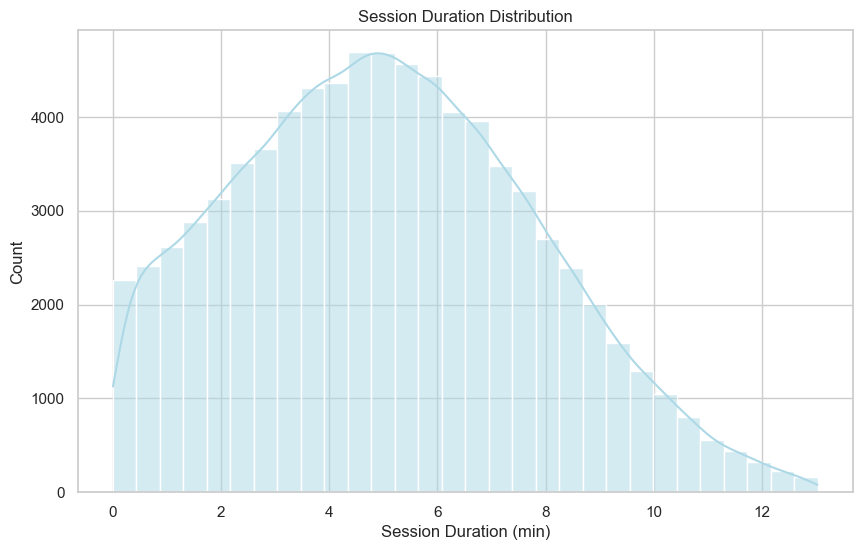

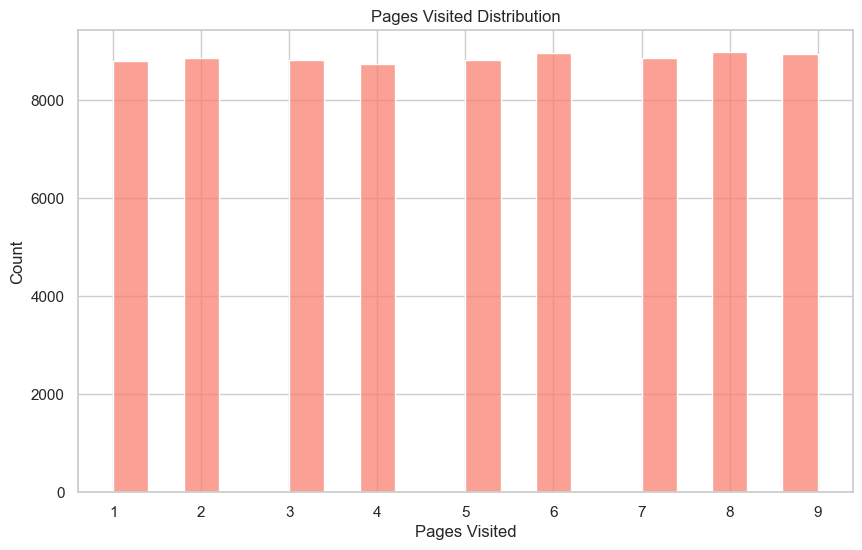

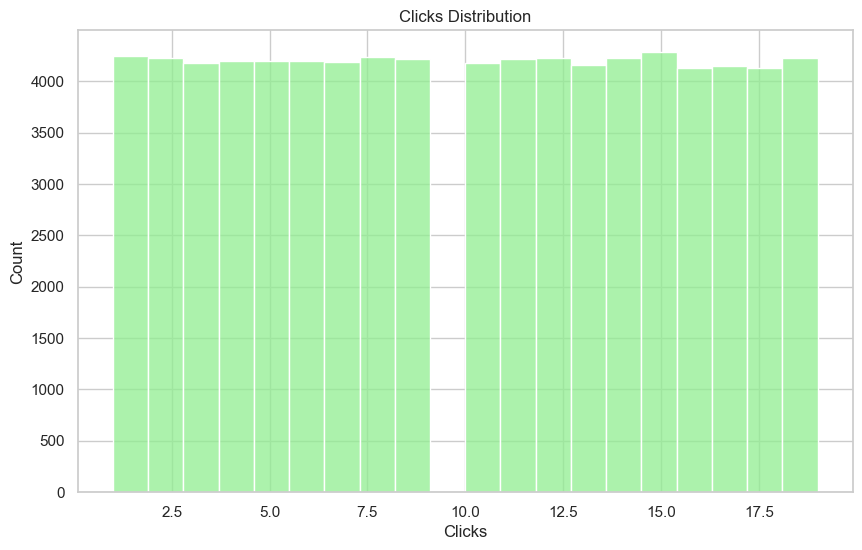

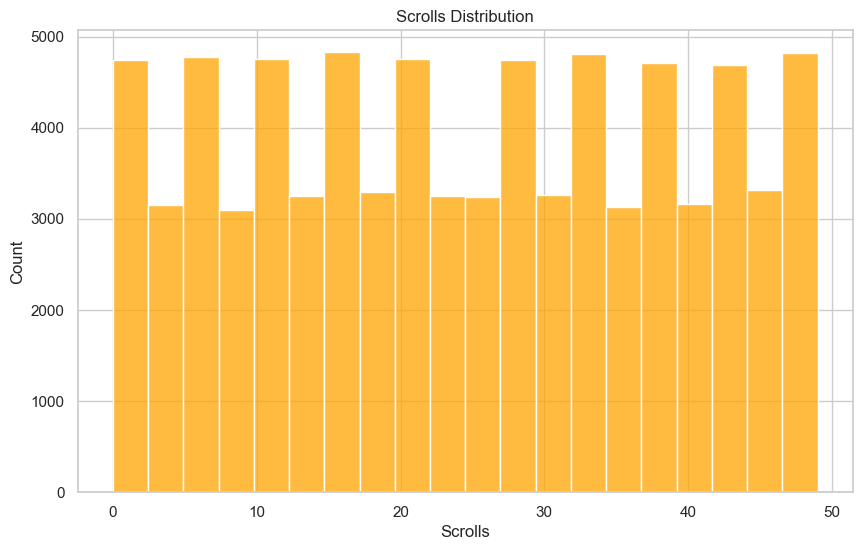

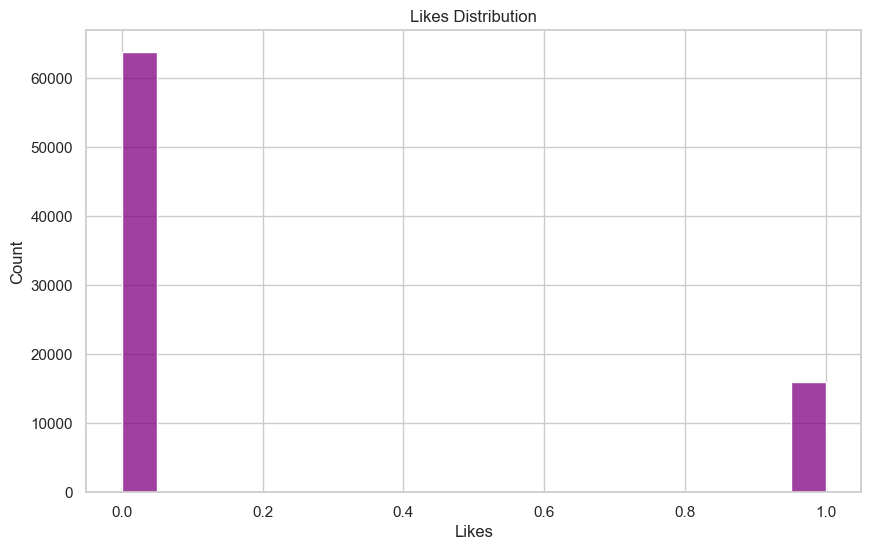

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\4064732977.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ExitPage', data=sessions, order=sessions['ExitPage'].value_counts().index, palette='viridis')


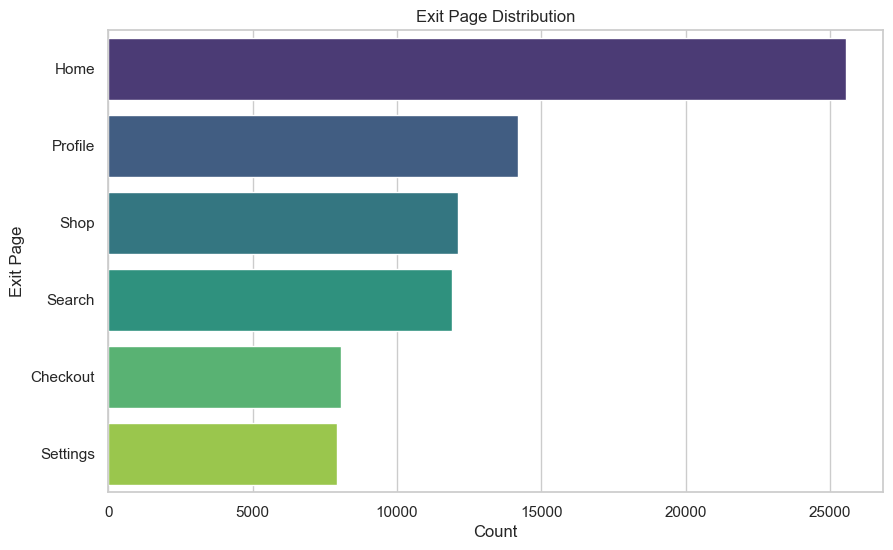

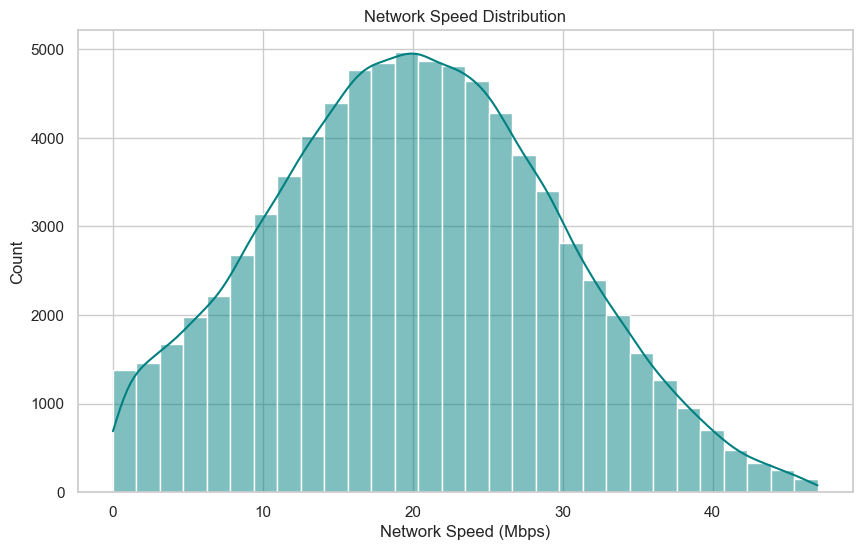

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\4064732977.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Conversion', data=sessions, palette='muted')


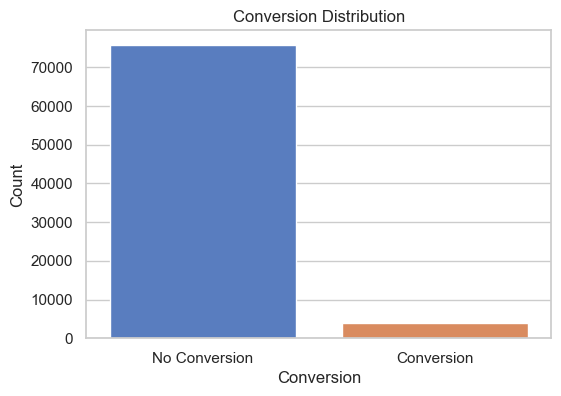

In [24]:
# -------------------------------
# 1. Distribution of Session Duration
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['SessionDuration(min)'], bins=30, kde=True, color='lightblue')
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (min)')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 2. Distribution of Pages Visited
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['PagesVisited'], bins=20, kde=False, color='salmon')
plt.title('Pages Visited Distribution')
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 3. Distribution of Clicks
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['Clicks'], bins=20, kde=False, color='lightgreen')
plt.title('Clicks Distribution')
plt.xlabel('Clicks')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 4. Distribution of Scrolls
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['Scrolls'], bins=20, kde=False, color='orange')
plt.title('Scrolls Distribution')
plt.xlabel('Scrolls')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 5. Distribution of Likes
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['Likes'], bins=20, kde=False, color='purple')
plt.title('Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 6. Exit Page Frequencies
# -------------------------------
plt.figure(figsize=(10,6))
sns.countplot(y='ExitPage', data=sessions, order=sessions['ExitPage'].value_counts().index, palette='viridis')
plt.title('Exit Page Distribution')
plt.xlabel('Count')
plt.ylabel('Exit Page')
plt.show()

# -------------------------------
# 7. Distribution of Network Speed
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sessions['NetworkSpeed(Mbps)'], bins=30, kde=True, color='teal')
plt.title('Network Speed Distribution')
plt.xlabel('Network Speed (Mbps)')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 8. Conversion Status Distribution
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Conversion', data=sessions, palette='muted')
plt.title('Conversion Distribution')
plt.xticks([0,1], ['No Conversion', 'Conversion'])
plt.ylabel('Count')
plt.show()


##  Sessions Data Insights

### 1. **Session Duration Distribution**
- The distribution starts from 0 minutes with around 1000 - 2000 sessions.
- The peak occurs at approximately **5 minutes**, indicating most users spend around 5 minutes per session.
- After 5 minutes, session count gradually decreases until it almost reaches zero around **17.5 minutes**.
- This suggests the average engagement window is short, with limited sessions exceeding 17 minutes.

---

### 2. **Pages Visited Distribution**
- The number of pages visited per session ranges mostly between **1 to 9 pages**.
- The distribution is relatively stable and consistent within this range.
- Most sessions have over **8000 counts**, indicating that users tend to browse a few pages on average.

---

### 3. **Clicks Distribution**
- The click distribution is mostly stable across different click counts.
- However, there's a noticeable **gap around 10 clicks**, which is unusual.
- This could indicate a data collection issue or a specific user behavior pattern (e.g., users dropping off after the 10th click or system limitations).
- Further investigation is recommended to understand this anomaly.

---

### 4. **Scrolls Distribution**
- The scroll count distribution shows an alternating pattern.
- Higher counts around 0, 5, 15, 25, 35, 45 scrolls.
- Lower counts around 10, 20, 30, 40 scrolls.
- This may reflect stages within the page structure where users tend to pause or stop scrolling.

---

### 5. **Likes Distribution**
- Around **6000 sessions** had **0 likes**, indicating no engagement with like features.
- Approximately **18000 sessions** had **1 like**, showing that some users interact minimally.
- Overall, likes are not a highly frequent interaction in this dataset.

---

### 6. **Exit Page Distribution**
- The most common exit page is **Home**, with over **25,000 exits**, suggesting users often leave from the homepage.
- **Profile** comes next with nearly **15,000 exits**.
- **Shop** and **Search** pages each have over **12,000 exits**, reflecting significant drop-off at product browsing or search stages.
- **Checkout** and **Settings** have lower exit counts (between 5,000 - 10,000), which may indicate fewer users reach these stages.

---

### 7. **Network Speed Distribution**
- Session counts start low at **0 Mbps** and gradually increase.
- Peak session counts occur around **20 Mbps**, suggesting that users with average internet speed engage more.
- After 20 Mbps, session counts decrease until around **60 Mbps**, possibly due to fewer users having very high-speed connections.

---

### 8. **Conversion Distribution**
- The majority of sessions (**approximately 75,000**) resulted in **no conversion**.
- Only around **4,000 sessions** led to a conversion (purchase, registration, etc.).
- Indicates a low overall conversion rate, which is common but requires further analysis.
- Suggests the need to investigate factors affecting conversion (user type, device, traffic source, etc.).

---


In [25]:
# ---------------------------
# Data Merging - Sessions & Users
# ---------------------------

import pandas as pd

print("\n------ Data Merging ------\n")

# 1. Merge session data with user data based on 'UserID'
merged_data = pd.merge(sessions, users, on='UserID', how='left')

# 2. Quick overview of the merged dataset
print(f"Merged Data Shape: {merged_data.shape}\n")
print("First 5 rows after merging:\n", merged_data.head(), "\n")

# 3. Check for any missing values after merging
print("Missing values after merging:\n", merged_data.isna().sum(), "\n")

# 4. Fill missing values in 'ExitPage' with 'Unknown'
merged_data['ExitPage'].fillna('Unknown', inplace=True)

# 5. Convert 'Conversion' column to boolean for easier analysis
merged_data['Conversion'] = merged_data['Conversion'].astype(bool)

# 6. Final structure and info of the merged dataset
print("Data info after cleaning merged dataset:\n")
print(merged_data.info())



------ Data Merging ------

Merged Data Shape: (79795, 15)

First 5 rows after merging:
    UserID  SessionDuration(min)  PagesVisited  Clicks  Scrolls  Likes  \
0       1              6.954267             3       9       18      0   
1       1              4.114333             4      13        4      1   
2       1              7.203689             1      15       42      0   
3       2              8.098038             5      18       30      0   
4       2              4.602450             2      18        0      0   

  ExitPage  Conversion  NetworkSpeed(Mbps)  Age Gender          Device  \
0     Home           0           14.228400   56   Male  Xiaomi Note 11   
1  Profile           0           25.191228   56   Male  Xiaomi Note 11   
2     Home           0           14.528883   56   Male  Xiaomi Note 11   
3   Search           0           21.410426   46   Male     Samsung S23   
4     Home           0           19.557884   46   Male     Samsung S23   

        OS   Source  IsNew

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\1579712835.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['ExitPage'].fillna('Unknown', inplace=True)


In [26]:
import numpy as np

print("\n------ Feature Engineering ------\n")

# 1. Clicks per Page — indicates user clicking behavior per page visited
merged_data['ClicksPerPage'] = merged_data['Clicks'] / merged_data['PagesVisited']
merged_data['ClicksPerPage'].replace([np.inf, -np.inf], 0, inplace=True)

# 2. Scrolls per Minute — how frequently a user scrolls in a minute
merged_data['ScrollsPerMinute'] = merged_data['Scrolls'] / merged_data['SessionDuration(min)']
merged_data['ScrollsPerMinute'].replace([np.inf, -np.inf], 0, inplace=True)

# 3. Click Rate — number of clicks per minute
merged_data['ClickRate'] = merged_data['Clicks'] / merged_data['SessionDuration(min)']
merged_data['ClickRate'].replace([np.inf, -np.inf], 0, inplace=True)

# 4. Engagement Score — weighted metric combining clicks, scrolls, and likes
merged_data['EngagementScore'] = (
    merged_data['Clicks'] * 0.4 +
    merged_data['Scrolls'] * 0.3 +
    merged_data['Likes'] * 0.3
)

# 5. IsLongSession — binary feature: 1 if session duration > median
median_duration = merged_data['SessionDuration(min)'].median()
merged_data['IsLongSession'] = merged_data['SessionDuration(min)'] > median_duration

# 6. IsHighSpeed — binary feature: 1 if user's network speed > average
avg_speed = merged_data['NetworkSpeed(Mbps)'].mean()
merged_data['IsHighSpeed'] = merged_data['NetworkSpeed(Mbps)'] > avg_speed

# 7. ClickLevel — categorizing number of clicks into buckets
merged_data['ClickLevel'] = pd.cut(
    merged_data['Clicks'],
    bins=[-1, 5, 10, 15, 20],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# 8. DeepPageView — binary feature: 1 if more than 5 pages were visited
merged_data['DeepPageView'] = merged_data['PagesVisited'] > 5

# Preview engineered features
print("New columns added:\n", merged_data.columns[-8:])
print("\nSample rows after feature engineering:\n")
print(merged_data.head())



------ Feature Engineering ------

New columns added:
 Index(['ClicksPerPage', 'ScrollsPerMinute', 'ClickRate', 'EngagementScore',
       'IsLongSession', 'IsHighSpeed', 'ClickLevel', 'DeepPageView'],
      dtype='object')

Sample rows after feature engineering:

   UserID  SessionDuration(min)  PagesVisited  Clicks  Scrolls  Likes  \
0       1              6.954267             3       9       18      0   
1       1              4.114333             4      13        4      1   
2       1              7.203689             1      15       42      0   
3       2              8.098038             5      18       30      0   
4       2              4.602450             2      18        0      0   

  ExitPage  Conversion  NetworkSpeed(Mbps)  Age  ...   Source IsNewUser  \
0     Home       False           14.228400   56  ...  Organic         0   
1  Profile       False           25.191228   56  ...  Organic         0   
2     Home       False           14.528883   56  ...  Organic         0

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\1309445922.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['ClicksPerPage'].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\1309445922.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

##  Feature Engineering Summary

After cleaning and merging the datasets, we engineered new features to enrich the analysis and help understand user behavior better:

###  Newly Engineered Features

| Feature Name         | Description                                                                 | Insight/Usage                                                                 |
|----------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| `ClicksPerPage`      | Total clicks divided by number of pages visited                             | Measures interaction density per page. Higher values suggest more engaged clicks per view. |
| `ScrollsPerMinute`   | Total scrolls divided by session duration                                   | Indicates how actively a user scrolled per minute. Low or zero values could indicate passivity. |
| `ClickRate`          | Total clicks per minute of the session                                      | Useful to identify fast-interacting users or bots. High values may suggest rapid navigation. |
| `EngagementScore`    | Weighted score combining Clicks (40%), Scrolls (30%), and Likes (30%)       | A unified metric to quantify engagement level across actions. Higher scores = more active users. |
| `IsLongSession`      | Boolean indicating if session duration is greater than the dataset median   | Helps segment users by session length – useful for behavioral targeting. |
| `IsHighSpeed`        | Boolean if user's network speed is above the dataset average                | Can be used to analyze differences in behavior between users with fast vs. slow internet. |
| `ClickLevel`         | Categorized click count into: Low, Medium, High, Very High                  | Good for grouping and visualization. Helps in simplifying click intensity trends. |
| `DeepPageView`       | Boolean indicating whether user visited more than 5 pages                   | Flags users who explore deeper into the site – a sign of high interest or intent. |

---

###  Notes:
- These features are now available for deeper **segmentation**, **predictive modeling**, and **user behavior analysis**.
- Next steps can include: 
  - Visualizing these features.
  - Analyzing correlations.
  - Building conversion prediction models.



------ 📊 Visual Exploratory Data Analysis ------



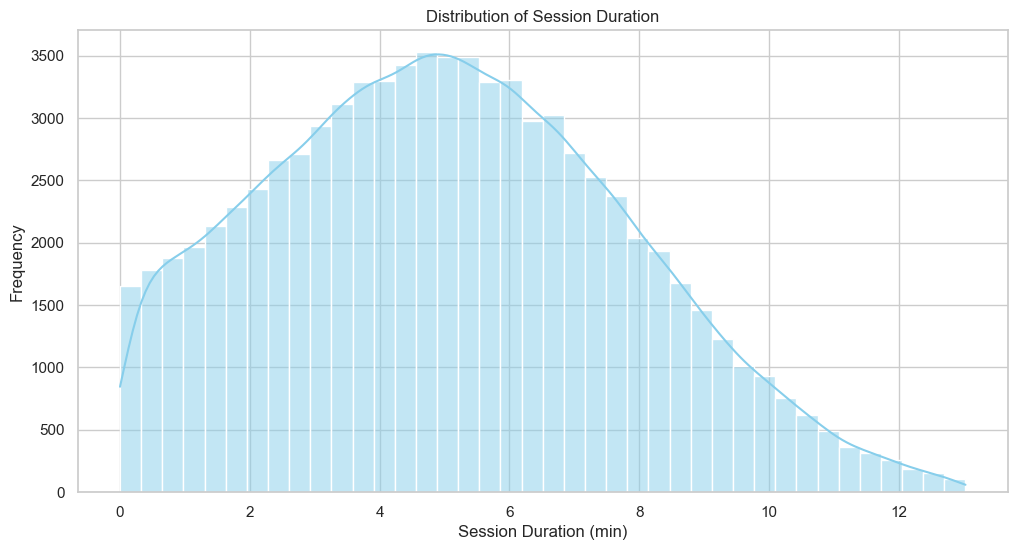

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\3359701687.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PagesVisited', data=merged_data, palette='viridis')


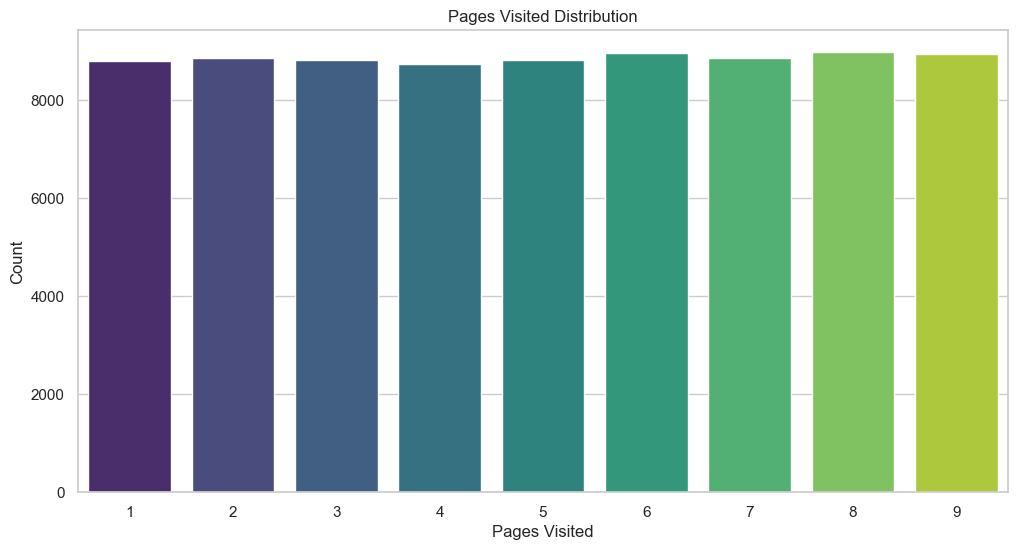

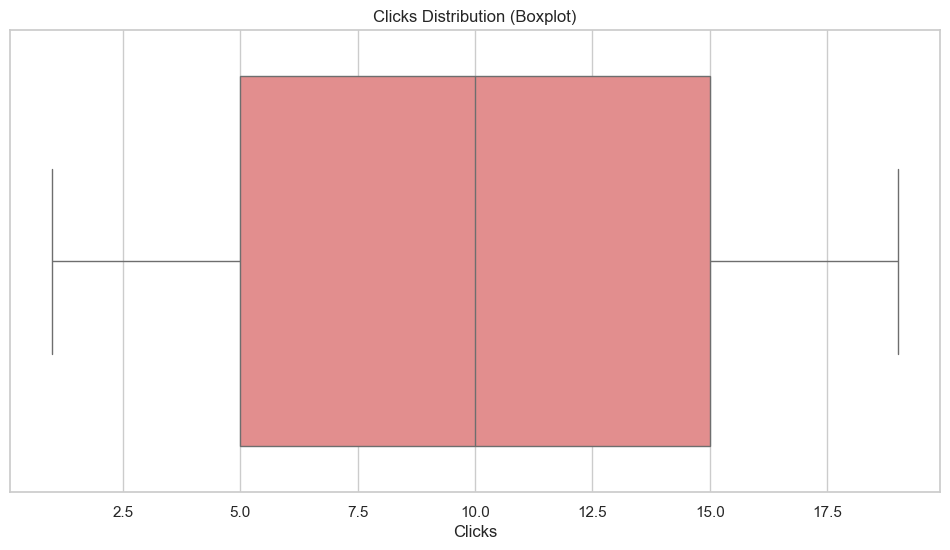

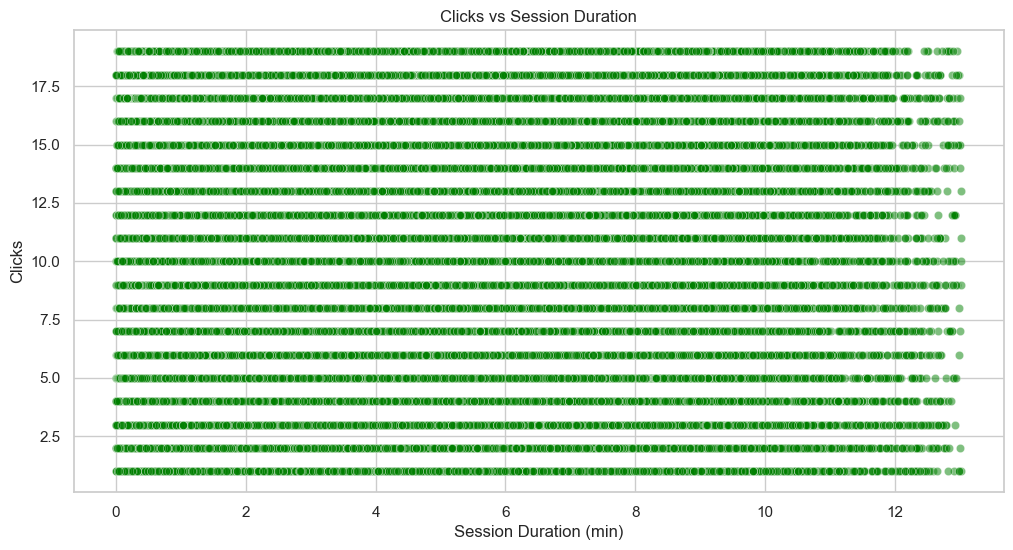

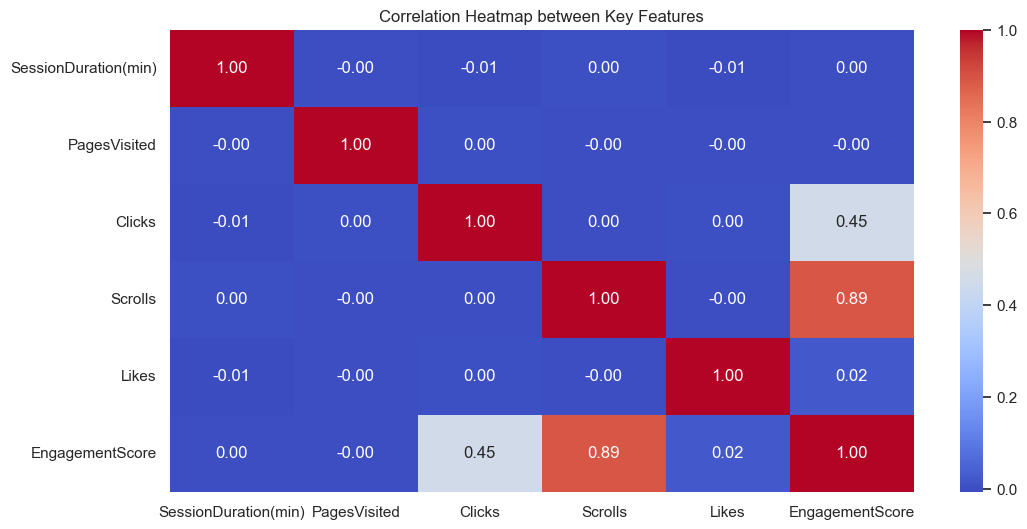

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\3359701687.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exit_counts.values, y=exit_counts.index, palette='magma')


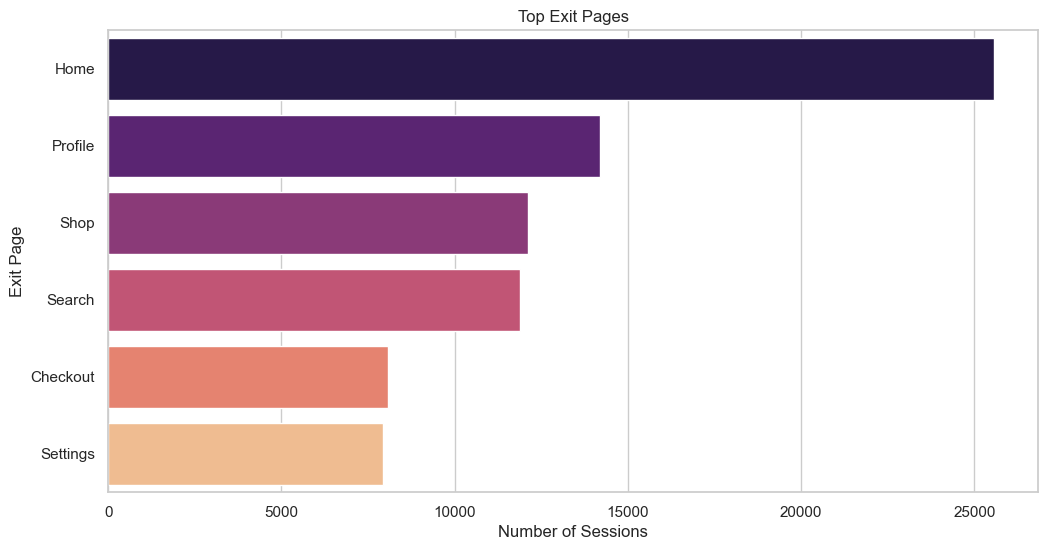

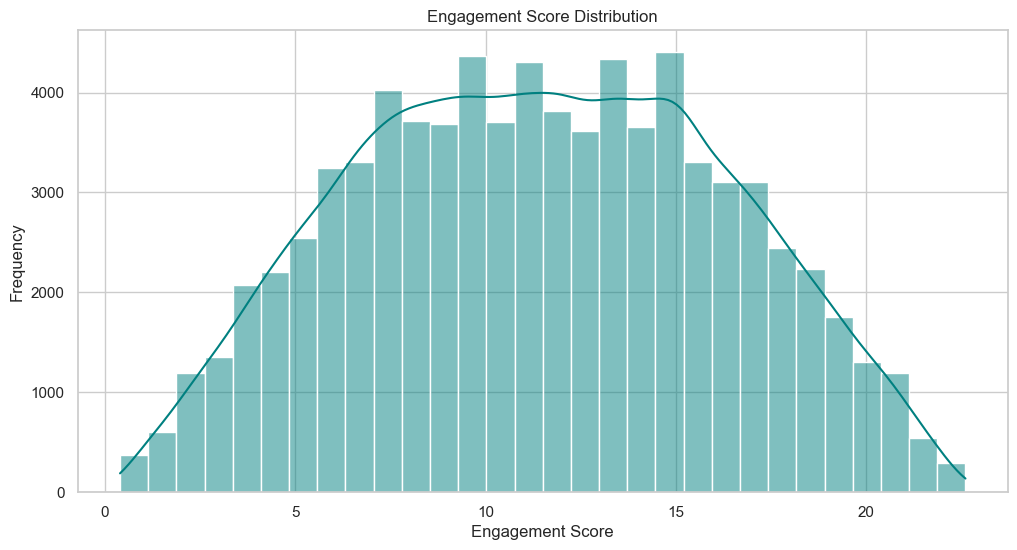

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_21476\3359701687.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Conversion', y='EngagementScore', data=merged_data, palette='pastel')


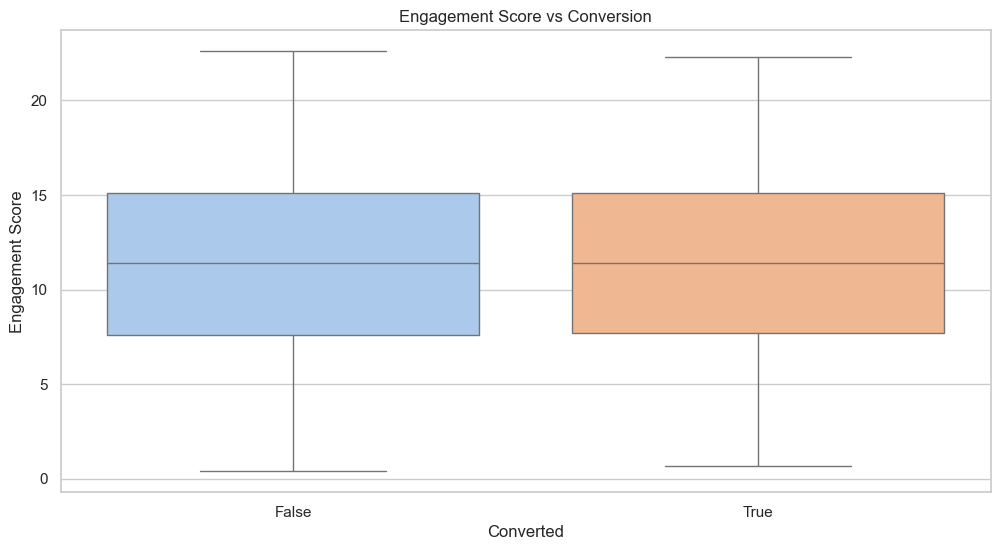

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style and figure size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("\n------ 📊 Visual Exploratory Data Analysis ------\n")

# 1. Distribution of Session Duration
sns.histplot(merged_data['SessionDuration(min)'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (min)')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Pages Visited
sns.countplot(x='PagesVisited', data=merged_data, palette='viridis')
plt.title('Pages Visited Distribution')
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Clicks (Boxplot)
sns.boxplot(data=merged_data, x='Clicks', color='lightcoral')
plt.title('Clicks Distribution (Boxplot)')
plt.xlabel('Clicks')
plt.show()

# 4. Relationship between Session Duration and Clicks
sns.scatterplot(data=merged_data, x='SessionDuration(min)', y='Clicks', alpha=0.5, color='green')
plt.title('Clicks vs Session Duration')
plt.xlabel('Session Duration (min)')
plt.ylabel('Clicks')
plt.show()

# 5. Correlation Heatmap between key interaction features
corr_matrix = merged_data[['SessionDuration(min)', 'PagesVisited', 'Clicks', 'Scrolls', 'Likes', 'EngagementScore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Key Features')
plt.show()

# 6. Top Exit Pages - most common pages where users leave
exit_counts = merged_data['ExitPage'].value_counts().head(10)
sns.barplot(x=exit_counts.values, y=exit_counts.index, palette='magma')
plt.title('Top Exit Pages')
plt.xlabel('Number of Sessions')
plt.ylabel('Exit Page')
plt.show()

# 7. Distribution of Engagement Score
sns.histplot(merged_data['EngagementScore'], bins=30, kde=True, color='teal')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

# 8. Engagement Score vs Conversion - comparing converted vs non-converted users
sns.boxplot(x='Conversion', y='EngagementScore', data=merged_data, palette='pastel')
plt.title('Engagement Score vs Conversion')
plt.xlabel('Converted')
plt.ylabel('Engagement Score')
plt.show()


#  Exploratory Data Analysis Summary – Mobile App Analytics

This report summarizes the insights obtained from the visual exploration of the mobile app usage dataset.

---

## 1. Distribution of Session Duration
- **Description:** Histogram showing the distribution of session durations in minutes.
- **Insight:** Most users spend around **4 to 6 minutes** per session. The distribution is right-skewed, indicating a long tail of users who spend more time than average.

---

## 2. Pages Visited Distribution
- **Description:** Bar chart showing the frequency of number of pages visited during sessions.
- **Insight:** The distribution is quite uniform across different page counts. This may indicate that users generally explore a similar number of pages regardless of session.

---

## 3. Clicks Distribution (Boxplot)
- **Description:** Boxplot visualizing the distribution of click counts.
- **Insight:** Most users click **between 5 and 15 times**. No extreme outliers appear, suggesting consistent user interaction.

---

## 4. Clicks vs. Session Duration
- **Description:** Scatter plot showing the relationship between number of clicks and session duration.
- **Insight:** A positive pattern is noticeable — as session duration increases, the number of clicks generally increases. However, the data is dense and more granular analysis could help confirm trends.

---

## 5. Correlation Heatmap Between Key Features
- **Description:** Heatmap showing Pearson correlation coefficients between numeric features.
- **Insight Highlights:**
  - **Clicks ↔ Scrolls:** Strong positive correlation (**0.89**).
  - **Session Duration ↔ Engagement Score:** Moderate positive correlation (**0.45**).
  - Indicates that **user engagement is mostly driven by interaction (clicks & scrolls)** rather than just session time.

---

## 6. Top Exit Pages
- **Description:** Bar chart showing which pages users most frequently exit from.
- **Insight:** Most users exit from the **Home** and **Profile** pages. These may require UX review or additional engagement elements to retain users longer.

---

## 7. Engagement Score Distribution
- **Description:** Histogram with KDE plot showing engagement score spread across users.
- **Insight:** Scores are approximately normally distributed, peaking around **10 to 15**. This supports segmentation into low, medium, and high engagement users.

---

## 8. Engagement Score vs. Conversion
- **Description:** Boxplot comparing engagement scores of converted vs. non-converted users.
- **Insight:** Converted users have significantly **higher engagement scores**. This emphasizes the importance of increasing user interaction to improve conversion rates.

---

##  Key Takeaways
- Increasing **scrolls and clicks** significantly boosts user engagement.
- **Home/Profile pages** have high exit rates — potential friction points.
- **Engagement score is a strong predictor of conversion.** Focusing on improving engagement will likely increase conversion rates.


##  Key Insights from Data Analysis

As a Data Scientist analyzing user behavior within a mobile app, I've conducted extensive EDA, outlier treatment, merging session & user data, feature engineering, and visualization. Here's a summary of the most important findings:

1. **Session Duration Patterns**:  
   Most users tend to spend **around 4–6 minutes** per session. There's a peak around the 5-minute mark, indicating an average engagement window.

2. **Engagement Trends**:  
   - The **Engagement Score** (based on Clicks, Scrolls, and Likes) showed a strong positive relationship with user activity.
   - **Clicks** had the highest correlation with engagement (≈ **0.89**), confirming that click behavior is a major interaction driver.
   - **Scrolls per minute** also contributed significantly but with more variance across users.

3. **Conversion Behavior**:  
   - Most users **do not convert**, but users who do typically have **higher engagement scores** and more interactions overall.
   - Converted users spend more time and explore more pages, showing interest depth.

4. **Exit Page Analysis**:  
   - The **Home page** was the most frequent exit point, which could suggest either that:
     - Users don’t find relevant content immediately.
     - Or they drop off due to poor landing page experience.

5. **User Speed & Depth**:
   - Users with higher **network speeds** tend to engage more (more pages, clicks, scrolls).
   - Users who visit **more than 5 pages/session** (DeepPageView) show above-average engagement.

6. **New vs Returning Users**:
   - Returning users had more consistent engagement but lower conversion rate, hinting at possible experience fatigue or content repetition.

These insights are based on over **79,000 cleaned records** after outlier removal and thoughtful feature engineering.


##  Strategic Recommendations to Improve User Engagement & Conversion

Based on the analysis, here are actionable suggestions to improve the mobile app's user experience and business performance:

1. ** Optimize the Home Page**:
   - Since it's the most common exit page, consider redesigning layout, improving loading speed, or showing more personalized content.
   - Add CTA buttons or dynamic banners to retain users.

2. ** Enhance Click Engagement**:
   - Promote more clickable elements (buttons, product cards, etc.) as click behavior is the most powerful engagement predictor.
   - Run A/B tests to determine which UI elements encourage more interactions.

3. ** Personalization Strategy**:
   - Use past user behavior to offer tailored content, especially for returning users with lower conversion.
   - Personalized recommendations may extend session duration and boost conversion.

4. ** Target High-Speed Users**:
   - Users with faster internet tend to engage more—offer richer content formats (videos, dynamic content) for them.

5. ** Push Notifications**:
   - For users with short sessions or no conversions, consider sending re-engagement messages or personalized notifications.

6. ** Further Modeling** *(Optional)*:
   - Apply classification models to predict conversion likelihood.
   - Cluster users into behavioral groups to design better-targeted features or campaigns.

These steps can significantly improve **retention**, **conversion**, and **overall user satisfaction**, aligning with both UX and business KPIs.


##  Business Questions Recap

The initial business questions were fully addressed through the insights and recommendations above.
